In [41]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import string

# Acceso a la Data Recolectada y su Transformacion

In [130]:
# Primero Accesamos a la data recolectada
with open('DataRecolectada - 1.json') as f:
    data_original = json.load(f)

In [131]:
# Generamos los nombres de las columnas del DF
columnas = ['Nombre','Sexo','Edo_Laboral','Edo_Civil','Edad','Diag_Previo','Tristeza','Pesimismo','Fracaso','Perdida_de_Placer',\
'Sentimientos_de_Culpa','Sentimientos_de_Castigo','Disconformidad_con_uno_mismo','Autocritica',\
'Pensamientos_o_Deseos_Suicidas','Llanto','Agitación','Perdida_de_Interés','Indecisión','Desvalorización','Perdida_de_Energía',\
'Cambios_en_los_Hábitos_de_Sueño','Irritabilidad','Cambios_en_el_Apetito','Dificultad_de_Concentración',\
'Cansancio_o_Fatiga','Perdida_de_Interés_en_el_Sexo', 'Respuesta_Recibida']

In [132]:
# Generamos el DF
df = pd.DataFrame.from_dict(data_original,orient='index',columns=columnas)
df.head()

,Nombre,Sexo,Edo_Laboral,Edo_Civil,Edad,Diag_Previo,Tristeza,Pesimismo,Fracaso,Perdida_de_Placer,...,Indecisión,Desvalorización,Perdida_de_Energía,Cambios_en_los_Hábitos_de_Sueño,Irritabilidad,Cambios_en_el_Apetito,Dificultad_de_Concentración,Cansancio_o_Fatiga,Perdida_de_Interés_en_el_Sexo,Respuesta_Recibida
1531026146,Ricardo,Hombre,Desempleado no Buscando,Casado,28,NO,D,D,D,D,...,D,D,C,G,D,G,D,D,D,Khhd
601887628,Reynaldo,Hombre,Empleado,Union Libre,25,SI,A,A,A,A,...,A,A,A,A,A,A,A,A,A,Ooi
1437527766,Carlos,Hombre,Empleado,Soltero,25,NO,A,A,A,B,...,A,A,B,C,B,G,B,A,B,Normal
33942341,Guillermo Arturo,Hombre,Empleado,Union Libre,35,NO,A,A,A,B,...,A,A,A,A,A,A,A,A,A,Animo
1772055088,Asairi,Hombre,Empleado,Casado,36,NO,A,A,C,A,...,A,A,A,A,A,A,A,A,A,"Ánimo, tú puedes"


In [133]:
# Como debemos de obtener las calificaciones por cada usuario, convertimos las respuestas obtenidas a numeros
# las sumamos y obtenemos la calificacion final.

def Valores_Respuestas_Usuario(respuestas_usuario):    
    valor_respuestas_numerico = []
    
    f = open('CuestionarioBeck.json','r')
    content = f.read()
    cuestionario = json.loads(content)

    for i in range(len(respuestas_usuario)):
        resp_user = respuestas_usuario[i]
        tema = cuestionario['Temas'][i]['Tema']
        data = cuestionario['Temas'][i]['Data']
        for x in range(len(data)):
            resp = data[x]['Inciso']
            valor = data[x]['Valor']
            if resp_user == resp:
                valor_respuestas_numerico.append(valor)
    
    return sum(valor_respuestas_numerico)

In [134]:
# Generamos un nuevo diccionario con la data transformada
data_valor = dict()

for i in data_original:
    try: 
        respuestas = data_original[i][6:-1]
        valores = Valores_Respuestas_Usuario(respuestas)
        data_valor.update({i:valores})
    except:
        data_valor.update({i:'null'})

In [135]:
# Lo convertimos en un DF
data_valor = pd.DataFrame.from_dict(data_valor,orient='index')
data_valor.head()

,0
1531026146,59
601887628,0
1437527766,12
33942341,1
1772055088,3


In [136]:
data_valor.shape

(47, 1)

In [137]:
df.shape

(47, 28)

In [138]:
# En ambos DF tenemos el mismo numero de registros, por lo que podemos unirlos. 
data = pd.concat([df,data_valor],axis=1)
data.drop('Nombre',axis=1,inplace=True)
data.rename(columns={0:'Calificacion_Final'},inplace=True)

In [139]:
# Obtenemos la data final, sin nombres y ya con la calificacion final de cada usuario
data.head()

,Sexo,Edo_Laboral,Edo_Civil,Edad,Diag_Previo,Tristeza,Pesimismo,Fracaso,Perdida_de_Placer,Sentimientos_de_Culpa,...,Desvalorización,Perdida_de_Energía,Cambios_en_los_Hábitos_de_Sueño,Irritabilidad,Cambios_en_el_Apetito,Dificultad_de_Concentración,Cansancio_o_Fatiga,Perdida_de_Interés_en_el_Sexo,Respuesta_Recibida,Calificacion_Final
1531026146,Hombre,Desempleado no Buscando,Casado,28,NO,D,D,D,D,D,...,D,C,G,D,G,D,D,D,Khhd,59
601887628,Hombre,Empleado,Union Libre,25,SI,A,A,A,A,A,...,A,A,A,A,A,A,A,A,Ooi,0
1437527766,Hombre,Empleado,Soltero,25,NO,A,A,A,B,A,...,A,B,C,B,G,B,A,B,Normal,12
33942341,Hombre,Empleado,Union Libre,35,NO,A,A,A,B,A,...,A,A,A,A,A,A,A,A,Animo,1
1772055088,Hombre,Empleado,Casado,36,NO,A,A,C,A,A,...,A,A,A,A,A,A,A,A,"Ánimo, tú puedes",3


# Analisis de la Data, Palabras

In [40]:
# Vamos a inciar analizando las respuestas recibidas por los usuarios cuando comentan a familiares o amigos que se
# sienten tristes o tienen depresion (o sespecha de)

respuestas_recibidas = data.Respuesta_Recibida

# Primero eliminamos los nulos
respuestas_recibidas = respuestas_recibidas.dropna()

# Posteriormente pasamos a una Lista y los unimos en un solo texto para poder procesarlo
respuestas_recibidas = [texto for texto in respuestas_recibidas]
respuestas_recibidas = ' '.join(respuestas_recibidas[2:])

texto_limpio = respuestas_recibidas.split(' ')

palabras = []

for palabra in texto_limpio:
    if len(palabra) >=3:
        palabras.append(palabra.upper())
        
        
palabras = ' '.join(palabras)
palabras

'NORMAL ANIMO ÁNIMO, PUEDES ERES MEJOR ECHALE GANAS ECHALE GANAS FELÍZ LLORES TUVE PROBLEMAS, NUNCA COMPARTÍ TODO TIENE TIEMPO NORMAL SENTIRSE ASÍ ... ESTAS HACIENDO MUCHAS COSAS VEZ PERO TOMA RITMO TRATA RESPIRAR CUANDO PUEDAS. CUENTAS CONMIGO POR QUÉ VAS TERAPIA? PODEMOS AYUDAR CON ALGO DENTRO DEL LÍMITE RAZONABLE, DÉJANOS SABER. ERES MÁS FUERTE QUE CUALQUIER PROBLEMA QUE TODO DEPENDE QUE PUEDO HACER QUE QUIERA QUE PREOCUPE TANTO. QUE TENGO CUALIDADES QUE CUALQUIERA LES GUSTARÍA TENER ÉCHALE GANAS VALES MUCHO TODO ESTARÁ BIEN TODO MEJORAR HECHO. AMAMOS TIEMPO SENTIDO TRISTE DEPRIMIDO PERO NUNCA PEDIDO AYUDA, HAY GENTE ALREDEDOR QUE ENCUENTRA PEOR QUE DEBO ESTAR PARA ELLOS ÁNIMO TODO PASA HAY QUE ECHARLE GANAS ÉCHALE GANAS ÉCHALE GANAS N/A ÉCHALE GANAS QUE SOY FUERTE QUE PUEDO SOLUCIONAR LAS COSAS QUE TODO PASARÁ PRONTO GENERAL, PALABRAS ALIENTO PARA BUSCAR OPCIONES SALIDA ESTOY AQUÍ PARA APOYARTE BUSCADO TRANQUILO, ÉCHALE GANAS. PREOCUPES PASARA QUE SITUACIÓN IBA MEJORAR, QUE ERA ALG

In [46]:
# Limpieza del texto

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«","´"]    

punctuation += sp_punctuation

#Reemplazamos signos de puntuación por "":
for p in punctuation:
    clean_texto = palabras.upper().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

clean_texto

'NORMAL ANIMO ÁNIMO PUEDES ERES MEJOR ECHALE GANAS ECHALE GANAS FELÍZ LLORES TUVE PROBLEMAS NUNCA COMPARTÍ TODO TIENE TIEMPO NORMAL SENTIRSE ASÍ  ESTAS HACIENDO MUCHAS COSAS VEZ PERO TOMA RITMO TRATA RESPIRAR CUANDO PUEDAS CUENTAS CONMIGO POR QUÉ VAS TERAPIA PODEMOS AYUDAR CON ALGO DENTRO DEL LÍMITE RAZONABLE DÉJANOS SABER ERES MÁS FUERTE QUE CUALQUIER PROBLEMA QUE TODO DEPENDE QUE PUEDO HACER QUE QUIERA QUE PREOCUPE TANTO QUE TENGO CUALIDADES QUE CUALQUIERA LES GUSTARÍA TENER ÉCHALE GANAS VALES MUCHO TODO ESTARÁ BIEN TODO MEJORAR HECHO AMAMOS TIEMPO SENTIDO TRISTE DEPRIMIDO PERO NUNCA PEDIDO AYUDA HAY GENTE ALREDEDOR QUE ENCUENTRA PEOR QUE DEBO ESTAR PARA ELLOS ÁNIMO TODO PASA HAY QUE ECHARLE GANAS ÉCHALE GANAS ÉCHALE GANAS NA ÉCHALE GANAS QUE SOY FUERTE QUE PUEDO SOLUCIONAR LAS COSAS QUE TODO PASARÁ PRONTO GENERAL PALABRAS ALIENTO PARA BUSCAR OPCIONES SALIDA ESTOY AQUÍ PARA APOYARTE BUSCADO TRANQUILO ÉCHALE GANAS PREOCUPES PASARA QUE SITUACIÓN IBA MEJORAR QUE ERA ALGO PASAJERO QUE DI

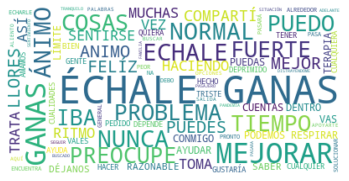

In [52]:
stopwords_es = stopwords.words('spanish')

custom_mask = np.array(Image.open('./Imagenes/Mujer y Hombre.jpg'))

# mask = custom_mask

wc = WordCloud(stopwords = stopwords_es, contour_width = 1, contour_color = 'black',background_color = 'white')
wc.generate(clean_texto)
plt.imshow(wc,interpolation = 'bilinear')

image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)
plt.axis('off')

plt.savefig("./Imagenes/Graficas/Grafica de Palabras.png",dpi = 1000)
plt.show()

# Analisis General

In [140]:
data['Edad'] = pd.to_numeric(data['Edad'])
data.head()

,Sexo,Edo_Laboral,Edo_Civil,Edad,Diag_Previo,Tristeza,Pesimismo,Fracaso,Perdida_de_Placer,Sentimientos_de_Culpa,...,Desvalorización,Perdida_de_Energía,Cambios_en_los_Hábitos_de_Sueño,Irritabilidad,Cambios_en_el_Apetito,Dificultad_de_Concentración,Cansancio_o_Fatiga,Perdida_de_Interés_en_el_Sexo,Respuesta_Recibida,Calificacion_Final
1531026146,Hombre,Desempleado no Buscando,Casado,28.0,NO,D,D,D,D,D,...,D,C,G,D,G,D,D,D,Khhd,59
601887628,Hombre,Empleado,Union Libre,25.0,SI,A,A,A,A,A,...,A,A,A,A,A,A,A,A,Ooi,0
1437527766,Hombre,Empleado,Soltero,25.0,NO,A,A,A,B,A,...,A,B,C,B,G,B,A,B,Normal,12
33942341,Hombre,Empleado,Union Libre,35.0,NO,A,A,A,B,A,...,A,A,A,A,A,A,A,A,Animo,1
1772055088,Hombre,Empleado,Casado,36.0,NO,A,A,C,A,A,...,A,A,A,A,A,A,A,A,"Ánimo, tú puedes",3


In [141]:
# Primero vamos a ver cuantas de las personas que realizaron el test cuentan con depresion

# baja = 0-13
# leve = 14-19
# moderada = 20-28
# grave = 29-63

def calificacion(x):
    if (x >=0 and x<=13):
        y = 'baja'
    elif (x >=14 and x<=19):
        y =  'leve'
    elif (x >=20 and x<=28):
        y = 'moderada'
    else:
        y = 'grave'

    return y

cal = lambda x : calificacion(x)

# Creamos una columna con la clasificacion por el puntage final

data['Clasificacion'] = data['Calificacion_Final'].apply(cal)
data.head()


# Pasamos la data a CSV
#data.to_csv('Data.csv')

In [142]:
data.isnull().sum()
data

,Sexo,Edo_Laboral,Edo_Civil,Edad,Diag_Previo,Tristeza,Pesimismo,Fracaso,Perdida_de_Placer,Sentimientos_de_Culpa,...,Perdida_de_Energía,Cambios_en_los_Hábitos_de_Sueño,Irritabilidad,Cambios_en_el_Apetito,Dificultad_de_Concentración,Cansancio_o_Fatiga,Perdida_de_Interés_en_el_Sexo,Respuesta_Recibida,Calificacion_Final,Clasificacion
1531026146,Hombre,Desempleado no Buscando,Casado,28.0,NO,D,D,D,D,D,...,C,G,D,G,D,D,D,Khhd,59,grave
601887628,Hombre,Empleado,Union Libre,25.0,SI,A,A,A,A,A,...,A,A,A,A,A,A,A,Ooi,0,baja
1437527766,Hombre,Empleado,Soltero,25.0,NO,A,A,A,B,A,...,B,C,B,G,B,A,B,Normal,12,baja
33942341,Hombre,Empleado,Union Libre,35.0,NO,A,A,A,B,A,...,A,A,A,A,A,A,A,Animo,1,baja
1772055088,Hombre,Empleado,Casado,36.0,NO,A,A,C,A,A,...,A,A,A,A,A,A,A,"Ánimo, tú puedes",3,baja
1769050128,Hombre,Empleado,Casado,30.0,NO,A,A,A,A,A,...,A,A,A,A,A,A,A,Eres lo mejor echale ganas,0,baja
1509037681,Mujer,Empleado,Soltero,52.0,NO,A,A,A,A,A,...,B,C,A,C,A,A,B,echale ganas,5,baja
897313585,Hombre,Empleado,Soltero,25.0,NO,A,A,A,A,A,...,A,A,A,A,A,A,A,Se felíz,0,baja
1327612243,Mujer,Empleado,Casado,33.0,NO,A,C,C,A,A,...,B,A,C,B,A,C,A,No llores,17,leve
1386110772,Hombre,Empleado,Soltero,29.0,NO,A,A,A,A,A,...,A,A,A,A,A,B,A,"Si tuve problemas, nunca lo compartí",1,baja


In [97]:
df_leve = data[data['Clasificacion'] == 'leve']
df_leve

,Sexo,Edo_Laboral,Edo_Civil,Edad,Diag_Previo,Tristeza,Pesimismo,Fracaso,Perdida_de_Placer,Sentimientos_de_Culpa,...,Perdida_de_Energía,Cambios_en_los_Hábitos_de_Sueño,Irritabilidad,Cambios_en_el_Apetito,Dificultad_de_Concentración,Cansancio_o_Fatiga,Perdida_de_Interés_en_el_Sexo,Respuesta_Recibida,Calificacion_Final,Clasificacion
1327612243,Mujer,Empleado,Casado,33.0,NO,A,C,C,A,A,...,B,A,C,B,A,C,A,No llores,17,leve
1512360113,Hombre,Empleado,Soltero,37.0,NO,A,B,B,A,A,...,C,D,A,A,B,C,A,Que tengo cualidades que a cualquiera les gust...,17,leve
1470368478,Hombre,Empleado,Soltero,49.0,SI,B,A,A,C,A,...,B,E,A,A,B,A,B,Échale ganas,16,leve
1527898695,Hombre,Estudiante,Soltero,22.0,NO,A,A,C,A,B,...,A,B,A,B,C,B,B,no,16,leve
1568529228,Hombre,Empleado,Soltero,27.0,SI,B,B,A,B,A,...,B,D,B,B,B,B,A,Estoy aquí para apoyarte,16,leve
171001419,Mujer,Empleado,Casado,31.0,NO,B,B,A,B,B,...,B,C,B,B,B,B,A,Que es la pandemia,18,leve


In [98]:
df_moderada = data[data['Clasificacion'] == 'moderada']
df_moderada

,Sexo,Edo_Laboral,Edo_Civil,Edad,Diag_Previo,Tristeza,Pesimismo,Fracaso,Perdida_de_Placer,Sentimientos_de_Culpa,...,Perdida_de_Energía,Cambios_en_los_Hábitos_de_Sueño,Irritabilidad,Cambios_en_el_Apetito,Dificultad_de_Concentración,Cansancio_o_Fatiga,Perdida_de_Interés_en_el_Sexo,Respuesta_Recibida,Calificacion_Final,Clasificacion
1761873131,Hombre,Empleado,Soltero,20.0,NO,A,B,B,C,B,...,C,D,B,A,B,B,A,Es normal sentirse así ... estas haciendo much...,21,moderada
1507973597,Hombre,Empleado,Union Libre,32.0,NO,A,A,C,B,B,...,B,A,B,E,C,B,A,Vales mucho,20,moderada
428181476,Mujer,Empleado,Soltero,29.0,NO,B,A,C,A,B,...,C,C,B,C,B,B,A,Todo estará bien,25,moderada
803363349,Hombre,Estudiante,Soltero,21.0,NO,B,B,B,C,A,...,B,A,B,C,C,A,A,No lo he hecho.,22,moderada
746533069,Mujer,Empleado,Union Libre,31.0,NO,B,B,A,C,A,...,C,B,B,C,B,C,C,si me he sentido triste o deprimido pero nunca...,25,moderada
1780491428,Mujer,Empleado,Soltero,53.0,SI,A,B,B,B,B,...,C,B,C,D,B,C,C,Échale ganas,26,moderada
1692625277,Mujer,Desempleado Buscando,Soltero,25.0,NO,B,D,B,C,B,...,B,D,B,D,B,B,A,"Que la situación iba a mejorar, que era algo p...",28,moderada


In [99]:
df_grave = data[data['Clasificacion'] == 'grave']
df_grave

,Sexo,Edo_Laboral,Edo_Civil,Edad,Diag_Previo,Tristeza,Pesimismo,Fracaso,Perdida_de_Placer,Sentimientos_de_Culpa,...,Perdida_de_Energía,Cambios_en_los_Hábitos_de_Sueño,Irritabilidad,Cambios_en_el_Apetito,Dificultad_de_Concentración,Cansancio_o_Fatiga,Perdida_de_Interés_en_el_Sexo,Respuesta_Recibida,Calificacion_Final,Clasificacion
1531026146,Hombre,Desempleado no Buscando,Casado,28.0,NO,D,D,D,D,D,...,C,G,D,G,D,D,D,Khhd,59,grave
1387564629,Mujer,Empleado,Soltero,24.0,NO,B,A,C,B,D,...,C,E,D,G,C,B,B,Échale ganas,33,grave
893090847,Mujer,Empleado,Soltero,47.0,SI,A,A,B,A,B,...,D,E,C,F,C,D,C,Échale ganas,30,grave


<AxesSubplot:xlabel='Clasificacion', ylabel='Count'>

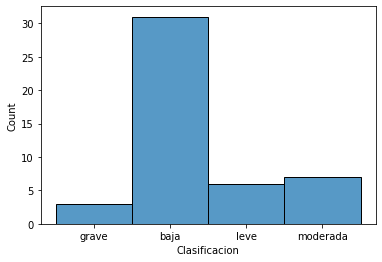

In [100]:
# distribucion de la clasificacion de los grados de depresion
sns.histplot(data,x='Clasificacion')

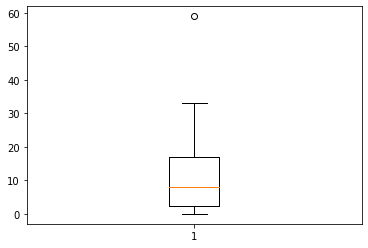

In [105]:
plt.boxplot(vert = True, x=data['Calificacion_Final']);